In [1]:
# Set up Environment and Requirements Package (In Terminal)
!python3 -m venv ../chmenv
!source ../chmenv/bin/activate

In [2]:
#!pip install jupyter ipykernel nilearn
!python3 -m ipykernel install --user --name=chmenv --display-name "Python (chmenv)"
#switch to notebook/virtual environment kernel
## deactivate

Installed kernelspec chmenv in /home/ejh2wy/.local/share/jupyter/kernels/chmenv


In [ ]:
# pip list # list installed packages
# pip freeze > requirements.txt # create requirements text/override it to update
# pip install -r requirements.txt # install requirements text in new environment
# pip freeze | xargs pip uninstall -y #uninstall all packages

In [5]:
### Command Line (from my directory)
# https://www.rc.virginia.edu/userinfo/howtos/storage/globus-cli/

# pip install globus-cli
# nano .bashrc
# add -> export PATH=$PATH:/home/ejh2wy/.local/bin
# source .bashrc
# globus login --no-local-server
# globus ls 1e0b9059-cc1d-419b-9a9c-d1af20b318dd:ABIDEII/ABIDEII_Long_Composite_Phenotypic.csv
# --recursive for folders after transfer
# globus transfer 1e0b9059-cc1d-419b-9a9c-d1af20b318dd:ABIDEII/ABIDEII_Long_Composite_Phenotypic.csv a93612a9-3e78-444b-827e-a55e72ecb552:home/ejh2wy/test.csv
#

# globus logout

/bin/bash: globus: command not found


/bin/bash: where: command not found


In [31]:
# Import Packages
import pandas as pd
import numpy as np
import os
import matplotlib
import nilearn
from nilearn.image import math_img
from nilearn import plotting, datasets
from pathlib import Path
import glob

In [14]:
# Paths

# Mask (an image of zeros and ones) to mask the brain's data
mask_path = './data/ABIDEII/ABIDEII-BNI_1/derivatives/fmriprep/sub-29006/ses-1/anat/sub-29006_ses-1_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

# Structural Image
image_path = './data/ABIDEII/ABIDEII-BNI_1/derivatives/fmriprep/sub-29006/ses-1/anat/sub-29006_ses-1_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

In [20]:
# Create a new image that contains only brain data (i.e. an image where the intensity of the voxels outside the brain are set to 0)
# "You could use the function math_img in the image module to multiply the structural image with the mask image. That should yield the image we need to feed our retrieval method."
result_img = math_img("img1 * img2", img1=mask_path, img2=image_path, copy_header_from="img2")

# Save resulting image to new folder for training data
output_dir = Path.cwd() / "data/cleaned_data"
output_dir.mkdir(exist_ok=True, parents=True)
result_img.to_filename(output_dir / "ABIDEII-BNI_1_sub-29006.nii.gz"
)

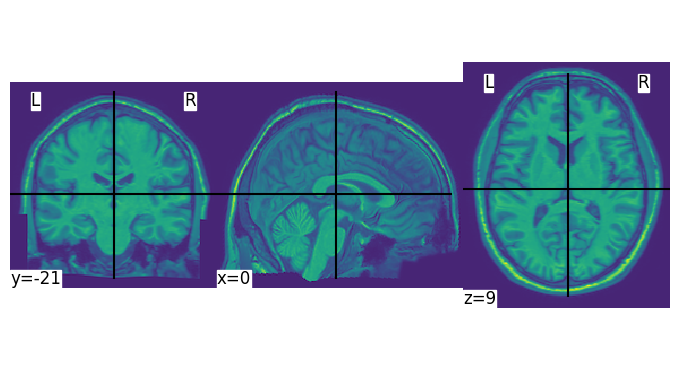

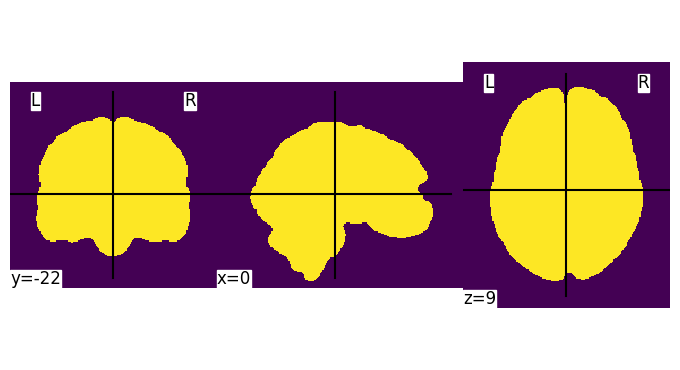

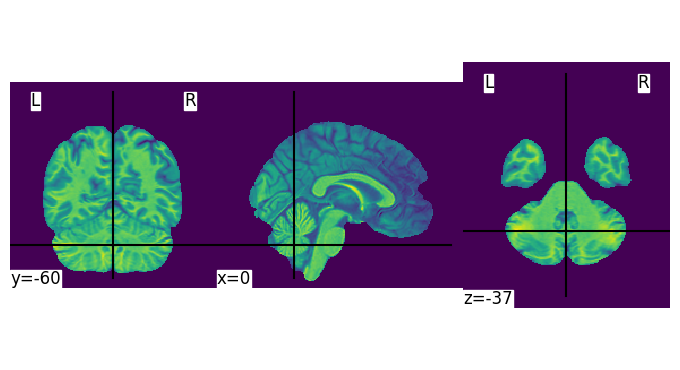

In [16]:
#Plots
plotting.plot_img(image_path)
plotting.plot_img(mask_path)
plotting.plot_img(result_img)

In [11]:
# Import Meta Data / Labels

df = pd.read_csv('data/ABIDEII_Composite_Phenotypic.csv')
df.head()

,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEII-BNI_1,29006,NaN,1,NaN,NaN,48.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-BNI_1,29007,NaN,1,NaN,NaN,41.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-BNI_1,29008,NaN,1,NaN,NaN,59.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-BNI_1,29009,NaN,1,NaN,NaN,57.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-BNI_1,29010,NaN,1,NaN,NaN,45.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_long = pd.read_csv('data/ABIDEII_Long_Composite_Phenotypic.csv')
df_long.head()

,SITE_ID,SUB_ID,SESSION,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEI-PITT,50002,Baseline,NaN,1,1,NaN,16.77,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-UPSM_Long,50002,Followup_1,NaN,1,1,NaN,18.49,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEI-PITT,50005,Baseline,NaN,1,1,NaN,13.73,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-UPSM_Long,50005,Followup_1,NaN,1,1,NaN,15.55,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEI-PITT,50006,Baseline,NaN,1,1,NaN,13.37,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Training Image Directory
output_dir = Path.cwd() / "data/cleaned_data"
output_dir.mkdir(exist_ok=True, parents=True)

# Load the CSV file
csv_file = "data/ABIDEII_Composite_Phenotypic.csv"  # Annotations File
data = pd.read_csv(csv_file)

# Base folder path
base_path = "data/ABIDEII"

# Iterate through each row in the CSV
for index, row in data.iterrows():
    site_id = row['SITE_ID']
    sub_id = row['SUB_ID']
    
    # Construct the anat folder path
    anat_folder = os.path.join(base_path, f"{site_id}/derivatives/fmriprep/sub-{sub_id}/ses-1/anat")

    if os.path.exists(anat_folder):
        # Mask (an image of zeros and ones) to mask the brain's data
        mask_path = glob.glob(os.path.join(anat_folder, "*brain_mask.nii.gz"))

        # Structural Image
        image_path = glob.glob(os.path.join(anat_folder, "*T1w.nii.gz"))

        # Result Image that contains only brain data
        result_img = math_img("img1 * img2", img1=mask_path, img2=image_path, copy_header_from="img2")

        # Save resulting image to new folder for training data
        output_dir = Path.cwd() / "data/cleaned_data"
        output_dir.mkdir(exist_ok=True, parents=True)
        result_img.to_filename(output_dir / f"{site_id}_sub-{sub_id}.nii.gz")
    else:
        # Skip file
        print(f"Site ID: {site_id} and Subject ID : {sub_id} do not exist, skipping...")


Site ID: ABIDEII-BNI_1 and Subject ID : 29031 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29866 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29872 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29873 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29875 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29880 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29890 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29891 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29893 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29894 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29895 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29901 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29909 do not exist, skipping...
Site ID: ABIDEII-EMC_1 and Subject ID : 29915 do not exist, skip

In [65]:
# CHECK

# Count Number of Created Images
def count_files(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

file_count = count_files(output_dir)

# Count Original Number of Folders
def count_folders(path):
    count = 0
    for entry in os.scandir(path):
        if entry.is_dir():
            count += 1
    return count

original_folder_path1 = "data/ABIDEII/ABIDEII-BNI_1/derivatives/fmriprep"
original_folder_path2 = "data/ABIDEII/ABIDEII-EMC_1/derivatives/fmriprep"
num_folders1 = count_folders(original_folder_path1)
num_folders2 = count_folders(original_folder_path2)

# Should Print True
file_count == (num_folders1 + num_folders2)

True